## Exercise 7: unsupervised learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

SEED = 42

## Dataset description

The chosen dataset is from the following kaggle page: https://www.kaggle.com/datasets/darshanprabhu09/countries-economy-gdp-and-everything
It gives various information about countries, such as GDP, population, area, etc. The dataset is in CSV format and contains 227 countries. This dataset is great for clustering, since it's pretty natural to cluster countries based on their GDP, population, area, etc. Also, we will be able to interpret the results pretty well, with a little bit of domain knowledge.

In [45]:
data = pd.read_csv("../data/unsupervised/countries-of-the-world.csv", sep=',',decimal=',')
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [5]:
data.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


Firstly, we see that some values are missing, which will be an issue for clustering. We will use a SimpleImputer from sklearn to fill in the missing values, using the mean of the column.

In [6]:
X = data.drop(['Country', "Region"], axis=1)
X = SimpleImputer(strategy="mean").fit_transform(X)

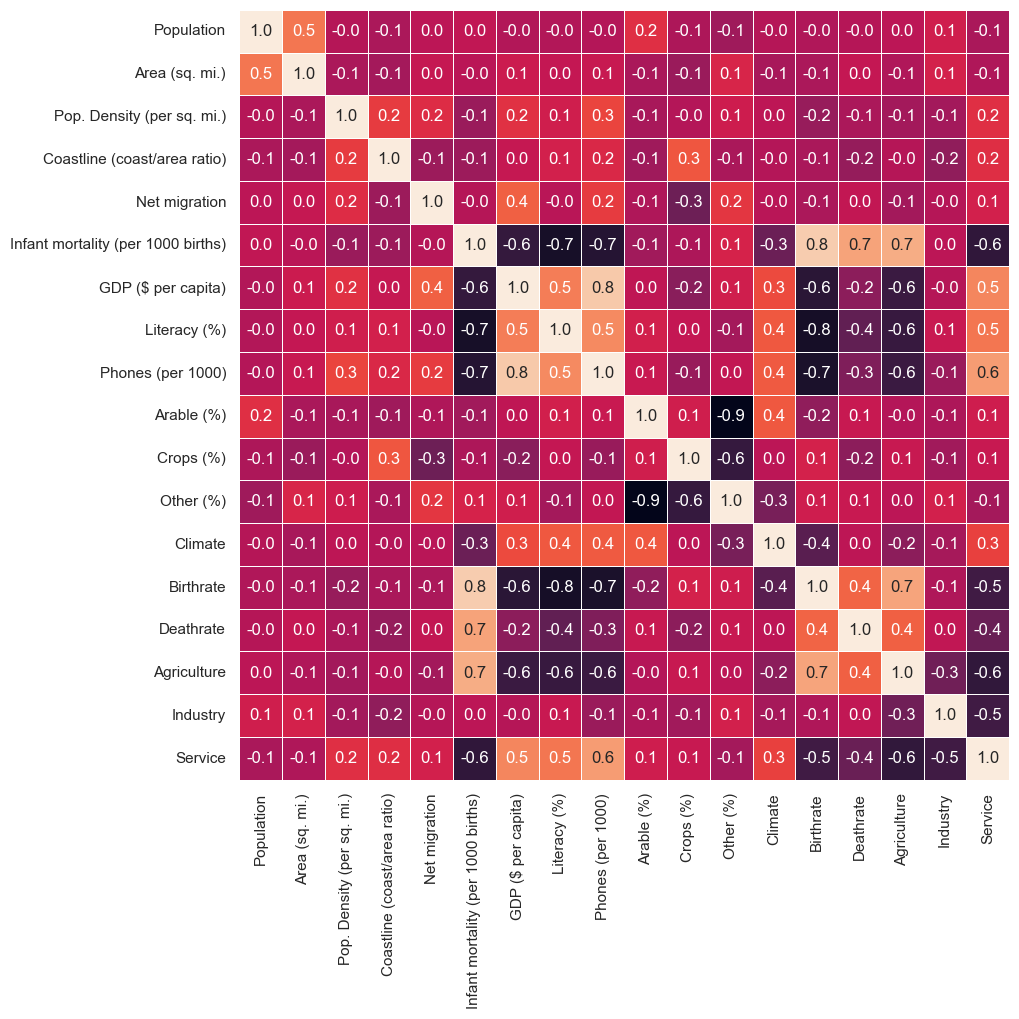

In [7]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="white")
sns.heatmap(X.corr(), square=True, linewidths=.5, annot=True, fmt='.1f', cbar=False);

This heatmap gives us a good overview of the data. Some of the features seem to be highly correlated with others (and make sense), such as "Birthrate" and "Infant mortality (per 1000 birth)", or "GDP ($ per capita)" and "Phones (per 1000)". On the other hand, some features are completely uncorrelated with all the others, such as "Population" and "Area". This is a good sign for clustering, as it means that we have a lot of different information about the countries.

We can now use the elbow method to find the optimal number of clusters.

In [8]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

def find_k(X, n_clusters):
    inertias = []
    for i in n_clusters:
        kmeans = KMeans(n_clusters=i, n_init="auto", random_state=SEED).fit(X)
        inertias.append(kmeans.inertia_)
    visualizer = KElbowVisualizer(kmeans, k=n_clusters)

    visualizer.fit(X)
    visualizer.show()
    return kmeans, inertias

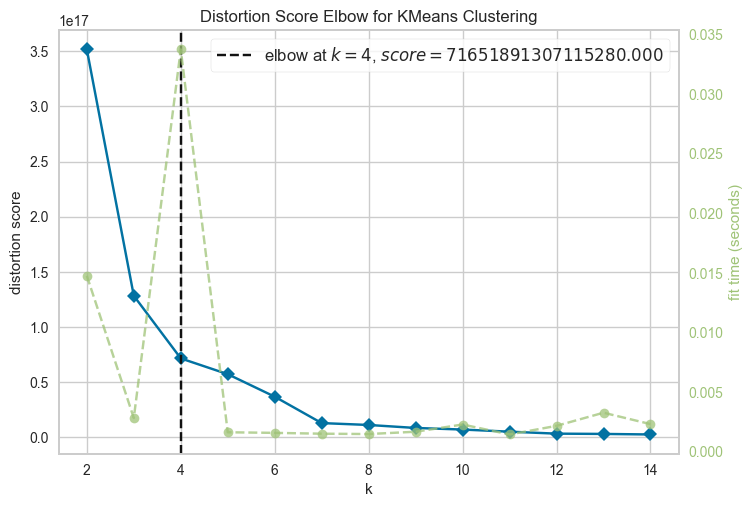

In [9]:
n_clusters = range(2,15)
kmeans, inertias = find_k(X, n_clusters)

We get an optimal value of 4 clusters. Intuitively, this makes sense, as we can imagine that the countries will be clustered into 4 groups: poor countries, developing countries, developed countries and very developed countries. Let's see what the clustering algorithm gives us.

In [10]:
clustering = KMeans(n_clusters=4, n_init="auto", random_state=SEED).fit(X)

/Users/quentinfisch/Documents/EPITA/ING2/SCIA/S8/FTML/FTML_RPGF/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


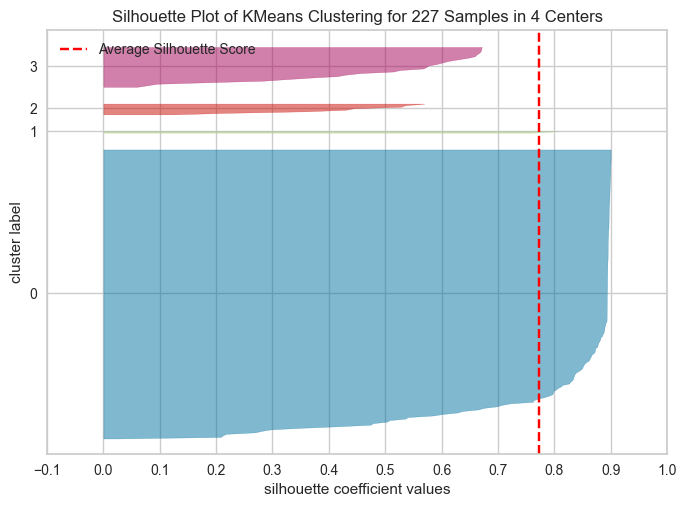

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 227 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
visualizer = SilhouetteVisualizer(clustering, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()  

There is a huge imbalance in the number of sample per clusters

In [12]:
data["cluster"] = clustering.labels_

In [13]:
silhouette_score(X, clustering.labels_, random_state=SEED)

0.772668746784219

In [15]:
from IPython.core import display as ICD

ICD.display(data[["Country","cluster"]][data["cluster"] == 0])
ICD.display(data[["Country","cluster"]][data["cluster"] == 1])
ICD.display(data[["Country","cluster"]][data["cluster"] == 2])
ICD.display(data[["Country","cluster"]][data["cluster"] == 3])

/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_3308/2283895099.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(data[["Country","cluster"]][data["cluster"] == 0])


,Country,cluster
0,Afghanistan,0
1,Albania,0
3,American Samoa,0
4,Andorra,0
5,Angola,0
...,...,...
222,West Bank,0
223,Western Sahara,0
224,Yemen,0
225,Zambia,0


/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_3308/2283895099.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(data[["Country","cluster"]][data["cluster"] == 1])


,Country,cluster
42,China,1
94,India,1


/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_3308/2283895099.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(data[["Country","cluster"]][data["cluster"] == 2])


,Country,cluster
16,Bangladesh,2
27,Brazil,2
95,Indonesia,2
103,Japan,2
152,Nigeria,2
156,Pakistan,2
169,Russia,2
214,United States,2


/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_3308/2283895099.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(data[["Country","cluster"]][data["cluster"] == 3])


,Country,cluster
2,Algeria,3
8,Argentina,3
32,Burma,3
36,Canada,3
43,Colombia,3
45,"Congo, Dem. Rep.",3
60,Egypt,3
65,Ethiopia,3
69,France,3
76,Germany,3


We get a very good silhouette score of `0.77`. However, the final clusters are very ambiguous. In fact, cluster 0 has 190 countries, with very different ones (Andorra, Afghanistan, Zambia). Cluster only has China and India, cluster 2 makes no much sense, as well as cluster 3. Surely, one of the features plays a huge role in the clustering, and the other ones are not taken into account enough. By looking at the way the clusters are built, and especially cluster 1, it could well be the population and the area of the countries that are the most important features. Let's try to remove them and see what happens.

In [44]:
X = data.drop(['Country', "Region", "cluster"], axis=1)
X = SimpleImputer(strategy="mean").fit_transform(X)
X = X.drop(["Population", "Area (sq. mi.)"], axis=1)

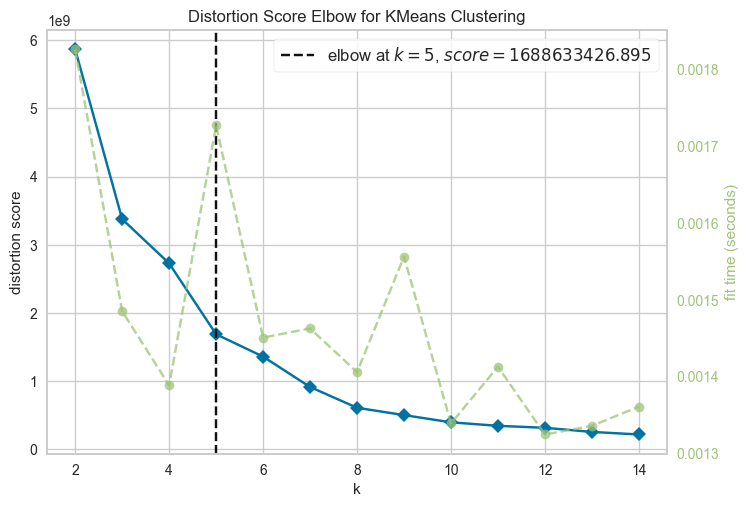

In [22]:
kmeans, inertias = find_k(X, n_clusters)

This time we get 5 optimal clusters, and we can see the elbow curve is smoother than before, so it's less obvious to choose the optimal number of clusters.

/Users/quentinfisch/Documents/EPITA/ING2/SCIA/S8/FTML/FTML_RPGF/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


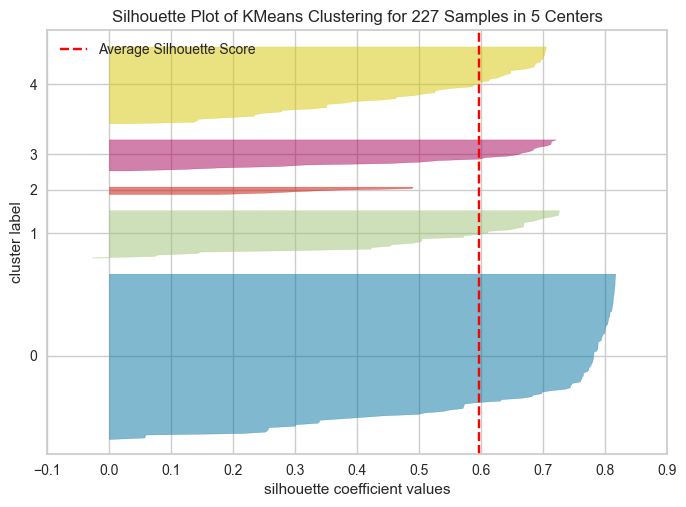

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 227 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
clustering = KMeans(n_clusters=5, n_init="auto", random_state=SEED).fit(X)

visualizer = SilhouetteVisualizer(clustering, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

The clusters are better balanced than before, which is great. Let's see if they make more sense.

In [24]:
data["cluster"] = clustering.labels_
silhouette_score(X, clustering.labels_, random_state=SEED)

0.5964410975909681

In [25]:
ICD.display(data[["Country","cluster"]][data["cluster"] == 0])
ICD.display(data[["Country","cluster"]][data["cluster"] == 1])
ICD.display(data[["Country","cluster"]][data["cluster"] == 2])
ICD.display(data[["Country","cluster"]][data["cluster"] == 3])
ICD.display(data[["Country","cluster"]][data["cluster"] == 4])

/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_3308/4081520522.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(data[["Country","cluster"]][data["cluster"] == 0])


,Country,cluster
0,Afghanistan,0
1,Albania,0
5,Angola,0
9,Armenia,0
13,Azerbaijan,0
...,...,...
221,Wallis and Futuna,0
222,West Bank,0
224,Yemen,0
225,Zambia,0


/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_3308/4081520522.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(data[["Country","cluster"]][data["cluster"] == 1])


,Country,cluster
4,Andorra,1
14,"Bahamas, The",1
15,Bahrain,1
17,Barbados,1
28,British Virgin Is.,1
29,Brunei,1
52,Cyprus,1
53,Czech Republic,1
66,Faroe Islands,1
71,French Polynesia,1


/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_3308/4081520522.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(data[["Country","cluster"]][data["cluster"] == 2])


,Country,cluster
22,Bermuda,2
38,Cayman Islands,2
121,Luxembourg,2
154,Norway,2
177,San Marino,2
214,United States,2


/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_3308/4081520522.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(data[["Country","cluster"]][data["cluster"] == 3])


,Country,cluster
10,Aruba,3
11,Australia,3
12,Austria,3
19,Belgium,3
36,Canada,3
54,Denmark,3
68,Finland,3
69,France,3
76,Germany,3
91,Hong Kong,3


/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_3308/4081520522.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(data[["Country","cluster"]][data["cluster"] == 4])


,Country,cluster
2,Algeria,4
3,American Samoa,4
6,Anguilla,4
7,Antigua & Barbuda,4
8,Argentina,4
...,...,...
206,Turkey,4
207,Turkmenistan,4
208,Turks & Caicos Is,4
215,Uruguay,4


The clusters seem to me divided more logicly:
- Cluster 0: very poor countries, with a low GDP or geopolitical issues
- Cluster 1: this cluster is more diversed, but it seems to be countries with low taxes, not specifically a high GDP, but developed countries
- Cluster 2: very rich countries, with a high GDP and a high GDP per capita. Interestingly, the US is in this cluster, along with very small countries such as Luxembourg or Bermuda
- Cluster 3: very developped countries, but not small ones. This cluster contains most of West Europe, Japan, Australia, Canada, etc.
- Cluster 4: developing countries, with a low GDP and a low GDP per capita. This cluster contains most of Africa, South America, and some countries in Asia.

However, the silhouette score is less than with the population and area, but the clusters make more sense.

In [26]:
# get iso codes and convert to numeric
iso_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
iso_codes

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
...,...,...,...
217,Virgin Islands,5.08,VGB
218,West Bank,6.64,WBG
219,Yemen,45.45,YEM
220,Zambia,25.61,ZMB


In [43]:
data["Country"] = data["Country"].str.strip()
data_iso = pd.merge(data, iso_codes, how='left', left_on='Country', right_on='COUNTRY').drop(['COUNTRY', "GDP (BILLIONS)"], axis=1)

In [28]:
import plotly.express as px

fig = px.choropleth(data_iso, locations="CODE", color="cluster", hover_name="Country")
fig.update_layout(title_text='Countries of the World', title_x=0.5, geo=dict(showframe=False, showcoastlines=False), margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

This clustering seems to make more sense than the previous one. However, it is still not perfect, and we could probably get better results by using other clustering algorithms. Let's try comparing several of them (using the following tutorial: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

In [42]:
X = data.drop(['Country', "Region", "cluster"], axis=1)
X = SimpleImputer(strategy="mean").fit_transform(X)
X = X.drop(["Population", "Area (sq. mi.)"], axis=1)

In [41]:
import time
import warnings

from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph

bandwidth = cluster.estimate_bandwidth(X, quantile=0.2)

connectivity = kneighbors_graph(
    X, n_neighbors=5, include_self=False
)
connectivity = 0.5 * (connectivity + connectivity.T)

kmeans = cluster.KMeans(n_clusters=5, n_init="auto", random_state=SEED)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means = cluster.MiniBatchKMeans(n_clusters=5, n_init="auto", random_state=SEED)
ward = cluster.AgglomerativeClustering(
    n_clusters=5, linkage="ward", connectivity=connectivity
)
spectral = cluster.SpectralClustering(
    n_clusters=5,
    eigen_solver="arpack",
    affinity="nearest_neighbors",
    random_state=SEED
)
dbscan = cluster.DBSCAN(eps=0.15)
optics = cluster.OPTICS(
    min_samples=7,
    xi=0.01,
    min_cluster_size=0.2
)
affinity_propagation = cluster.AffinityPropagation(
    damping=0.75, preference=-220, random_state=SEED
)
average_linkage = cluster.AgglomerativeClustering(
    linkage="average",
    metric="cityblock",
    n_clusters=5,
    connectivity=connectivity
)
birch = cluster.Birch(n_clusters=5)
gmm = mixture.GaussianMixture(
    n_components=5, covariance_type="full", random_state=SEED
)

clustering_algorithms = (
    ("KMeans", kmeans),
    ("MiniBatch KMeans", two_means),
    ("Affinity Propagation", affinity_propagation),
    ("MeanShift", ms),
    ("Spectral Clustering", spectral),
    ("Ward", ward),
    ("Agglomerative Clustering", average_linkage),
    ("DBSCAN", dbscan),
    ("OPTICS", optics),
    ("BIRCH", birch),
    ("Gaussian Mixture", gmm),
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()

    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the "
            + "connectivity matrix is [0-9]{1,2}"
            + " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning,
        )
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding"
            + " may not work as expected.",
            category=UserWarning,
        )
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)

    data_iso["cluster"] = y_pred
    fig = px.choropleth(data_iso, locations="CODE", color="cluster", hover_name="Country")
    fig.update_layout(title_text=f'Clustering with {name}', title_x=0.5, geo=dict(showframe=False, showcoastlines=False), margin={"r":0,"t":50,"l":0,"b":0})
    fig.show()

    try:
        score = silhouette_score(X, y_pred, random_state=SEED)
        print(f"{name} - Silhouette Coefficient: {score:.3f}")
    except:
        print("Silhouette Coefficient not available for this algorithm.")
        pass

KMeans - Silhouette Coefficient: 0.596


MiniBatch KMeans - Silhouette Coefficient: 0.563


Silhouette Coefficient not available for this algorithm.


MeanShift - Silhouette Coefficient: 0.621


Spectral Clustering - Silhouette Coefficient: 0.427


Ward - Silhouette Coefficient: 0.588


Agglomerative Clustering - Silhouette Coefficient: 0.383


Silhouette Coefficient not available for this algorithm.


OPTICS - Silhouette Coefficient: 0.230


BIRCH - Silhouette Coefficient: 0.588


Gaussian Mixture - Silhouette Coefficient: 0.277


Some of the algortihm are very inefficient, with only 1 cluster for Agglomerative Clustering or DBSCAN, or as many clusters as countries for Affinity Propagation. The other algorithms give us a more reasonable number of clusters, and decent results. The best silhoutte score is for MeanShift with `0.621`. In term of intuitive clustering (very subjective), the best method seems to still be Kmeans. It gives a very understandable clustering, with makes a lot of sense. Also, Minibatch/Kmeans looks good, but it has a lower silhoutte score than Kmeans.

## Conclusion

The classification on this dataset is very interesting, because it is very intuitive. We can easily interpret the results, and see if the clustering makes sense. We saw that higher silhouette score might not mean better clustering, and that we should always look at the results and see if they make sense. We also saw that some features are more important than others, and that we should be careful when choosing the features to use for clustering.